## Rarita Schwinger SCAN

In [4]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys
import os
import signal

from io import StringIO

%matplotlib inline
import matplotlib.pyplot as plt 

In [5]:
#Benchmark point
timeout_s = 3600
lamL      = 1.0
lam2      = 0.000001
lam6      = 0.000002
lam7      = 0.000003
mmh       = 125.1
mmV0      = 100.0
mmA0      = 101.0
mmVm      = 101.1
kp1       = 0.0
kp2       = 0.0
Yn11      = 1.59
Yn12      = 0.0
Yn13      = 0.0
Yn21      = 0.0
Yn22      = 0.0
Yn23      = 0.0
Yn31      = 0.0
Yn32      = 0-0
Yn33      = 0.0
MNN1      = 10.0
MNN2      = 200.0  
MNN3      = 300.0  

In [34]:
NUM = 20
x=[]

MNN1      = 1.0
for i in range(0,NUM):
    
    #Change MNN1 mass
    MNN1 = MNN1 +1

    #Write data into data.par for micrOMEGAs
    first=f"lamL {lamL}\
    \nlam2 {lam2}\
    \nlam6 {lam6}\
    \nlam7 {lam7}\
    \nmmh  {mmh}\
    \nmmV0 {mmV0}\
    \nmmA0 {mmA0}\
    \nmmVm {mmVm}\
    \nkp1  {kp1}\
    \nkp2  {kp2}\
    \nYn11 {Yn11}\
    \nYn12 {Yn12}\
    \nYn13 {Yn13}\
    \nYn21 {Yn21}\
    \nYn22 {Yn22}\
    \nYn23 {Yn23}\
    \nYn31 {Yn31}\
    \nYn32 {Yn32}\
    \nYn33 {Yn33}\
    \nMNN1 {MNN1}\
    \nMNN2 {MNN2}\
    \nMNN3 {MNN3}"
    archive = open('data.par','w')
    archive.write(first)
    archive.close()
    
    mo = subprocess.getoutput('~/Work/micromegas_6.0.3/RS_Scotogenic/relic_density data.par')

    Omega = eval(mo.split('Omega=')[1].split()[0])

    x.append([lamL,lam2,lam6,lam7,mmV0,mmA0,mmVm,kp1,kp2,Yn11,Yn12,Yn13,Yn21,Yn22,Yn23,Yn31,Yn32,Yn33,MNN1,MNN2,MNN3,Omega])

x=np.asarray(x)

xd=pd.DataFrame(x,columns=['lamL','lam2','lam6','lam7','mmV0','mmA0','mmVm','kp1','kp2','Yn11','Yn12','Yn13','Yn21','Yn22',
                          'Yn23','Yn31','Yn32','Yn33','MNN1','MNN2','MNN3','Omega'])

xd.to_csv('xd_scan-general.csv')

In [35]:
#xd=pd.read_csv('xd_scan-general.csv')
xd[:3]

,lamL,lam2,lam6,lam7,mmV0,mmA0,mmVm,kp1,kp2,Yn11,...,Yn21,Yn22,Yn23,Yn31,Yn32,Yn33,MNN1,MNN2,MNN3,Omega
0,1.0,0.000001,0.000002,0.000003,100.0,101.0,101.1,0.0,0.0,1.59,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,200.0,300.0,3.560
1,1.0,0.000001,0.000002,0.000003,100.0,101.0,101.1,0.0,0.0,1.59,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,200.0,300.0,1.420
2,1.0,0.000001,0.000002,0.000003,100.0,101.0,101.1,0.0,0.0,1.59,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,200.0,300.0,0.695


## Dark matter $\Omega h^2$

In [40]:
#Experimental values for DM:Planck results 2018
e = 10
Omega = 0.1200
Omega_min=Omega - e*0.0012
Omega_max=Omega + e*0.0012
print( Omega_min, Omega,Omega_max)

0.108 0.12 0.132


In [41]:
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

In [ ]:
xd.

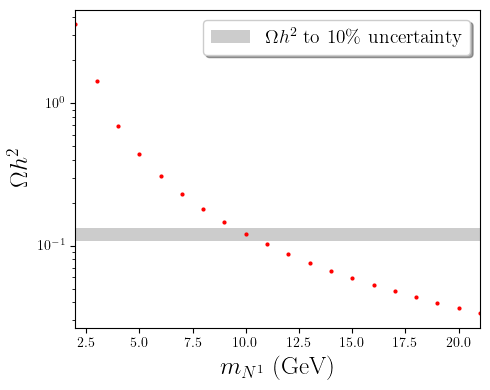

In [52]:
plt.figure(figsize=(5,4))

plt.semilogy(xd.MNN1,xd.Omega,color='red', marker='.',ms=4,linestyle='')

n=np.linspace(xd.MNN1.min(),xd.MNN1.max(),10)
plt.fill_between(n,Omega_min,Omega_max,facecolor='grey',alpha=0.4,label=r'$\Omega h^2$ to $10\%$ uncertainty')

#plt.hlines(Omega_max,0.1,1e4, color='cyan',label=r'')
#plt.hlines(Omega_min,0.1,1e4, color='cyan',label=r'')
#plt.hlines(Omega,0.1,1e4, 'r',lw=2,label=r'')
#plt.text(0.5,0.12,r'0.12',color='black', fontsize=10)

plt.xlabel(r'$m_{N^1}$ (GeV)',size=18)
plt.ylabel(r'$\Omega h^2$',size=18)
plt.legend(prop={'size':14},shadow=True,loc='best')

plt.xlim(xd.MNN1.min(), xd.MNN1.max())
plt.tight_layout()

#plt.savefig('plots/DM.pdf')
plt.show()